Задание.
Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import colors

In [4]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
data['variety'] = iris.target
iris_data = data[['sepal length (cm)', 'sepal width (cm)', 'variety']]
iris_data.head(20)

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(iris_data, test_size=0.2, random_state=18)

y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(data_train, y_train)
lda.predict(data_test)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(result[0], result[1]))
lda.coef_

Accuracy =  0.7666666666666667


array([[-5.74557666,  8.25391356],
       [ 1.42398114, -3.58167227],
       [ 3.96311763, -4.08046199]])

/var/folders/1r/zdb41tls7vg775n3d2h3tbvc0000gn/T/ipykernel_10286/2832648182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_to_draw['variety'] = list(lda.predict(data_test))
/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


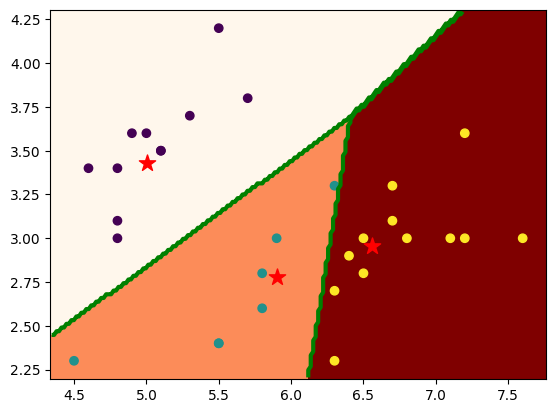

In [8]:
result_to_draw = data_test[:]
result_to_draw['variety'] = list(lda.predict(data_test))
plt.scatter(
    result_to_draw['sepal length (cm)'],
    result_to_draw['sepal width (cm)'],
    c=result_to_draw['variety']
)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='OrRd', zorder=-1)
plt.contour(xx, yy, Z, [0.5, 1.5], linewidths=3., colors='green')

plt.show()

In [9]:
iris_classes = iris_data[:]
del iris_classes['variety']

/var/folders/1r/zdb41tls7vg775n3d2h3tbvc0000gn/T/ipykernel_10286/3963731053.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)


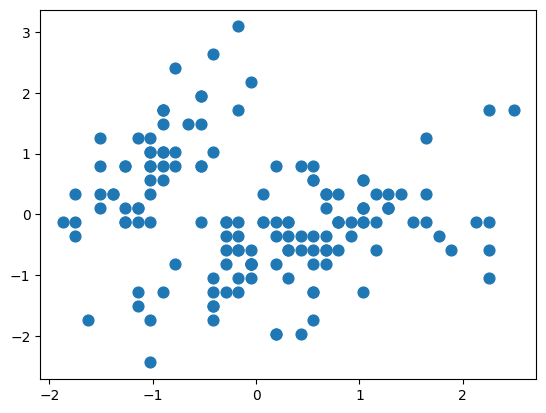

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_classes)
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='autumn', s=60)

In [11]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)

/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

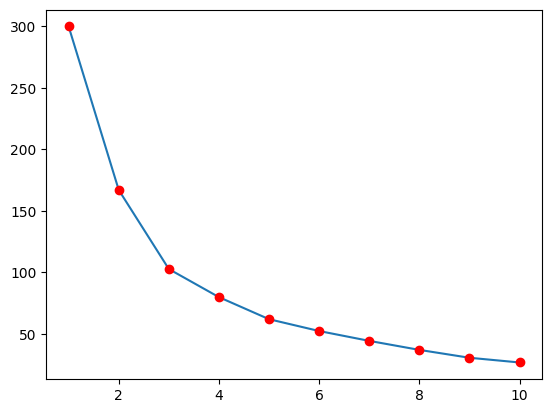

In [12]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


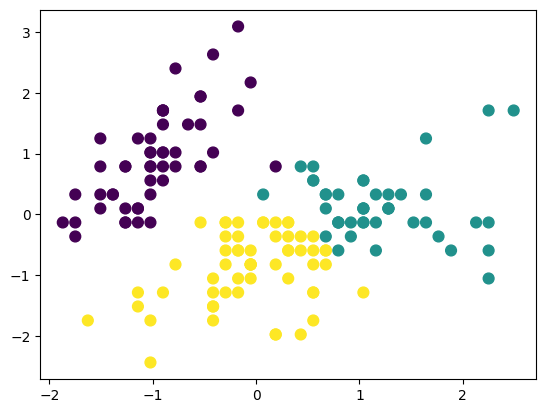

In [13]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(iris_scaled)
clusters
plt.scatter(iris_scaled[:, 0], iris_scaled[:, 1],cmap='viridis', c=clusters, s=60)

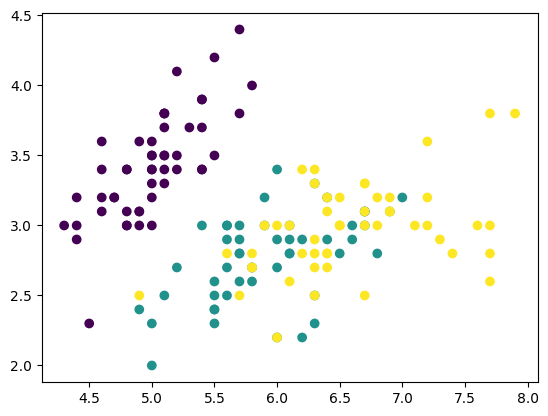

In [15]:
plt.scatter(
    iris_data['sepal length (cm)'],
    iris_data['sepal width (cm)'],
    cmap='viridis', c=iris_data['variety']
)